In [ ]:
import requests
import matplotlib as plt

host = 'http://localhost:8080'
response = requests.get(host + '/online')
if response.status_code == 200:
    # print(response.json())
    status = response.json()['status']
    print(f'The server is {status}.')
else:
    print('The server is offline.')
    exit()

The server is online.


In [ ]:
# a) Retrieve and print the list of all monitored devices.
response = requests.get(host + '/devices')
devices =[]
if response.status_code == 200:
    devices = response.json()
    print(devices)
else:
    print('Failed to retrieve devices.')
    devices = []

{'mac_addresses': ['0x56a24219aeec']}


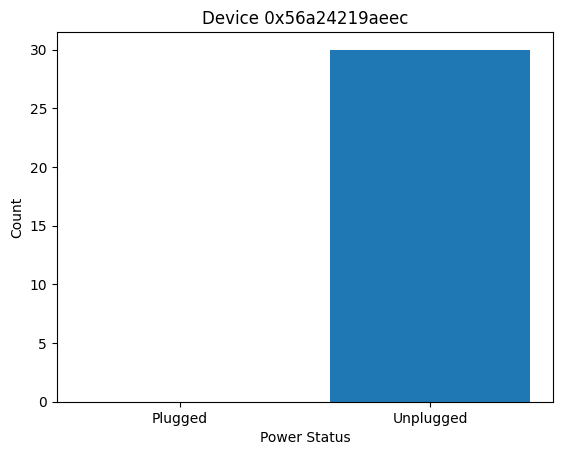

In [ ]:
import matplotlib.pyplot as plt
import datetime

start_date="2023-12-21"
end_date = "2024-01-20"

for mac in devices['mac_addresses']:
    try:
        response = requests.get(f"{host}/device/{mac}/?start_date={start_date}&end_date={end_date}")
        response.raise_for_status()
        data = response.json()

        # Extracting power plugged and unplugged counts
        plugged_counts = sum(1 for x in data['power_plugged'] if x == '1')
        unplugged_counts = sum(1 for x in data['power_plugged'] if x == '0')


        # Plotting
        plt.bar(['Plugged', 'Unplugged'], [plugged_counts, unplugged_counts])
        plt.title(f"Device {mac}")
        plt.xlabel('Power Status')
        plt.ylabel('Count')
        plt.show()

    except requests.RequestException as e:
        print(f"HTTP Request failed: {e}")
    except KeyError as e:
        print(f"Missing data in response: {e}")


In [ ]:
response = requests.get(host + '/devices/?blt=25&plugged=0')
low_battery_devices = response.json()
print("Devices with low battery and power unplugged:", low_battery_devices)


Devices with low battery and power unplugged: {'mac_addresses': []}


In [ ]:
if devices['mac_addresses']:
    first_device = devices['mac_addresses'][0]
    response = requests.delete(f"{host}/device/{first_device}")
    print("Response for deletion:", response.text)
else:
    print("No devices to delete.")


Response for deletion: Everything worked as expected


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1b0b0df8-8392-4edb-9f9f-6f8029fb1a2c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>